## <font color = 'brick'> <center> Data Analysis for the Movie Industry </center> </font>

### <font color = '#FF7033'> About Data </font>

This is a Movie Industry dataset.There are 7668 movies in the dataset (around 220 movies per year, 1986-2016)<br><br>
Each movie have attributes (15)
`budget,company, country, director, gross, name, rating, released, runtime,score,votes, star, writer and year.` <br> <br>
The dataset is scrapped from IMdB using Python, and can be found at `https://www.kaggle.com/datasets/danielgrijalvas/movies`

### <font color = '#FF7033'> Importing Packages and Data </font>

In [1]:
## Importing Packages

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,8)

In [2]:
## Importing, reading the data and creating dataframe

df = pd.read_csv('movies.csv')

### <font color = '#FF7033'> Inspecting Data / Data Walkthrough </font>

In [3]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [4]:
# shape of the dataframe

df.shape

(7668, 15)

In [5]:
# name of columns

for column in df.columns:
    print(column)

name
rating
genre
year
released
score
votes
director
writer
star
country
budget
gross
company
runtime


In [6]:
## datatypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
## missing data

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
## checking duplicates

df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### <font color = '#FF7033'> Data Cleaning </font>

#### <font color = 'Olive'> Dealing with Null Values </font>

In [10]:
## Checking most frequent value in 'rating' column

df['rating'].describe()

count     7591
unique      12
top          R
freq      3697
Name: rating, dtype: object

In [11]:
## Being a categorical value, replace Null values in 'rating' column with most frequent value

df['rating'].fillna(value = 'R', inplace = True)

In [12]:
## replacing the numerical colums 'gross', 'budget', 'score', votes and 'runtime' missing values with mean

mean_budget = df['budget'].mean()
mean_gross = df['gross'].mean()
mean_score = df['score'].mean()
mean_votes = df['votes'].mean()
mean_runtime = df['runtime'].mean()

df['budget'].fillna(value = mean_budget, inplace = True)
df['gross'].fillna(value = mean_gross, inplace = True)
df['score'].fillna(value = mean_score, inplace = True)
df['votes'].fillna(value = mean_votes, inplace = True)
df['runtime'].fillna(value = mean_runtime, inplace = True)

In [13]:
## now, we have very less rows with missing values, and which cannot we can not impute with other values.
## To avoid inaccuracy, drop the remaining rows with missing values

df.dropna(inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7646 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7646 non-null   object 
 1   rating    7646 non-null   object 
 2   genre     7646 non-null   object 
 3   year      7646 non-null   int64  
 4   released  7646 non-null   object 
 5   score     7646 non-null   float64
 6   votes     7646 non-null   float64
 7   director  7646 non-null   object 
 8   writer    7646 non-null   object 
 9   star      7646 non-null   object 
 10  country   7646 non-null   object 
 11  budget    7646 non-null   float64
 12  gross     7646 non-null   float64
 13  company   7646 non-null   object 
 14  runtime   7646 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 955.8+ KB


In [15]:
## Two columns with similar data ('Year, 'Released'). drop the released column due to redundancy.

df.drop(columns = ['released'], inplace = True)

In [16]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
#change datatype of columns 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [18]:
## Ordering Our Data for Clarity

df.sort_values(by = ['gross'], ascending = False, inplace = False).head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


### <font color = '#FF7033'> Correlation Analysis / Data Analysis </font>

**Features Correlation to Gross Earnings** <br><br>
**`Correlation:`** A statistical measure that describes the relationship between two variables, and the direction and strength of that relationship.<br><br>
**`Pearson Correlation Coefficient:`** Useful for continous variables following a linear relationship. Values range from `1` to `-1`. 1 indicates positive correlation, 0 indicates no correlation, and -1 indicates negative correlation.<br><br>
We will be focussing on highest correlation with gross earning.<br>
We'll use `pearson method` and create correlation matrix, and subsequent visualizations.

In [19]:
## Correlation Matrix between all numeric columns

correlation_matrix = df.corr(numeric_only = True, method = 'pearson')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097902,0.223077,0.266659,0.252283,0.119892
score,0.097902,1.000000,0.409468,0.064230,0.182881,0.399908
votes,0.223077,0.409468,1.000000,0.420950,0.628735,0.308890
budget,0.266659,0.064230,0.420950,1.000000,0.711629,0.264983
gross,0.252283,0.182881,0.628735,0.711629,1.000000,0.241287
runtime,0.119892,0.399908,0.308890,0.264983,0.241287,1.000000


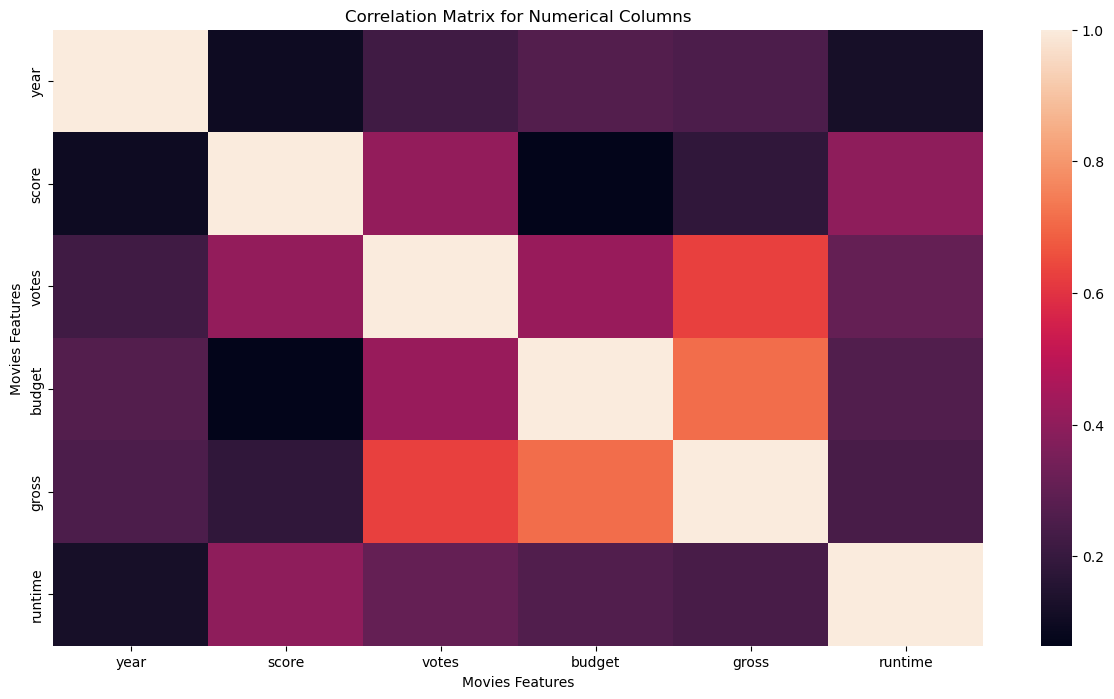

In [20]:
## Visualizing Correlation Matrix using a heatmap

sns.heatmap(correlation_matrix)

plt.title("Correlation Matrix for Numerical Columns") 

plt.xlabel("Movies Features")
plt.ylabel("Movies Features")


plt.show()

**Higher coefficient implies higher correlation** <br>
From the heatmap, we can cleaerly see the higher correlation between: 
1. `budget` and `gross`
2. `votes` and `gross`
<br>
<br>

We can further analyze the correlation using `regplot` function of seaborn library.



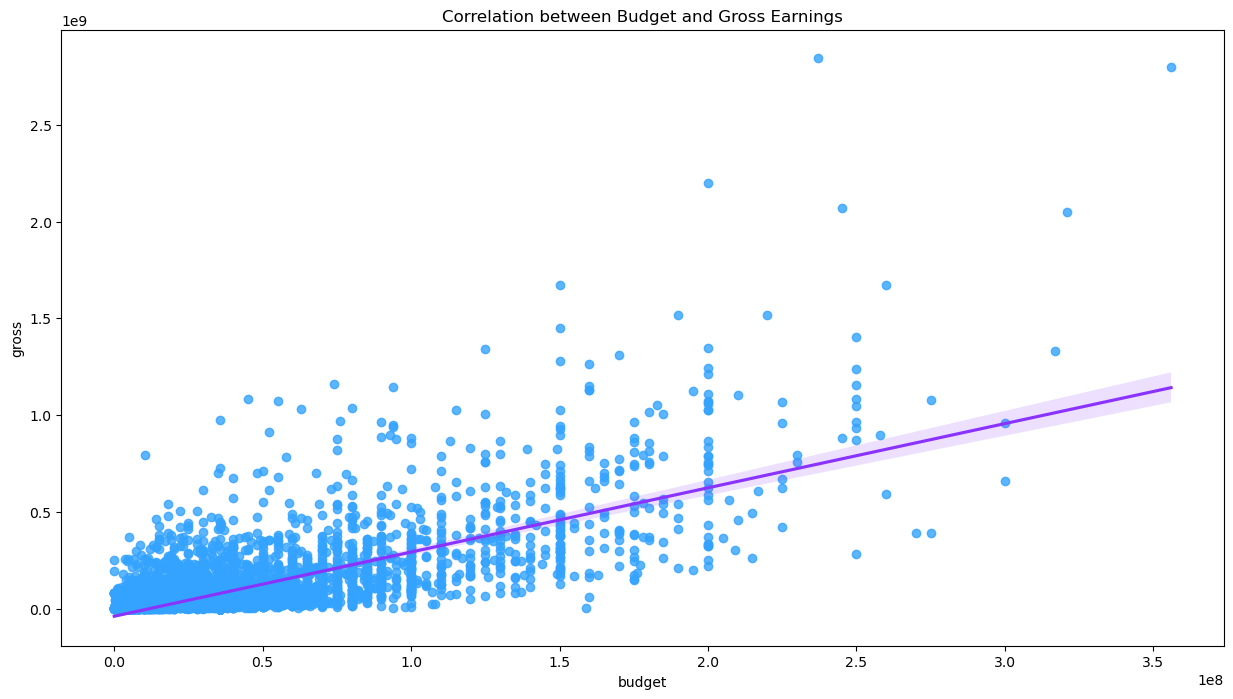

In [21]:
## Correlation between Budget and Gross Earnings 

sns.regplot(x = 'budget', y = 'gross',
            data = df,
            scatter_kws = {'color' : '#33A3FF'},
            line_kws = {'color' : '#8A33FF'})

plt.title('Correlation between Budget and Gross Earnings')
plt.grid(False)

plt.show()

- The regression plot above depicts the positive correlation between budget and gross earnings.
- The blue scatter points represent individual `movies`
- Regression line represents a trend that higher budgets lead to greater gross earnings.

<font color = '#33E4FF'> *Higher Budget leads to Higher Gross Earnings* </font>

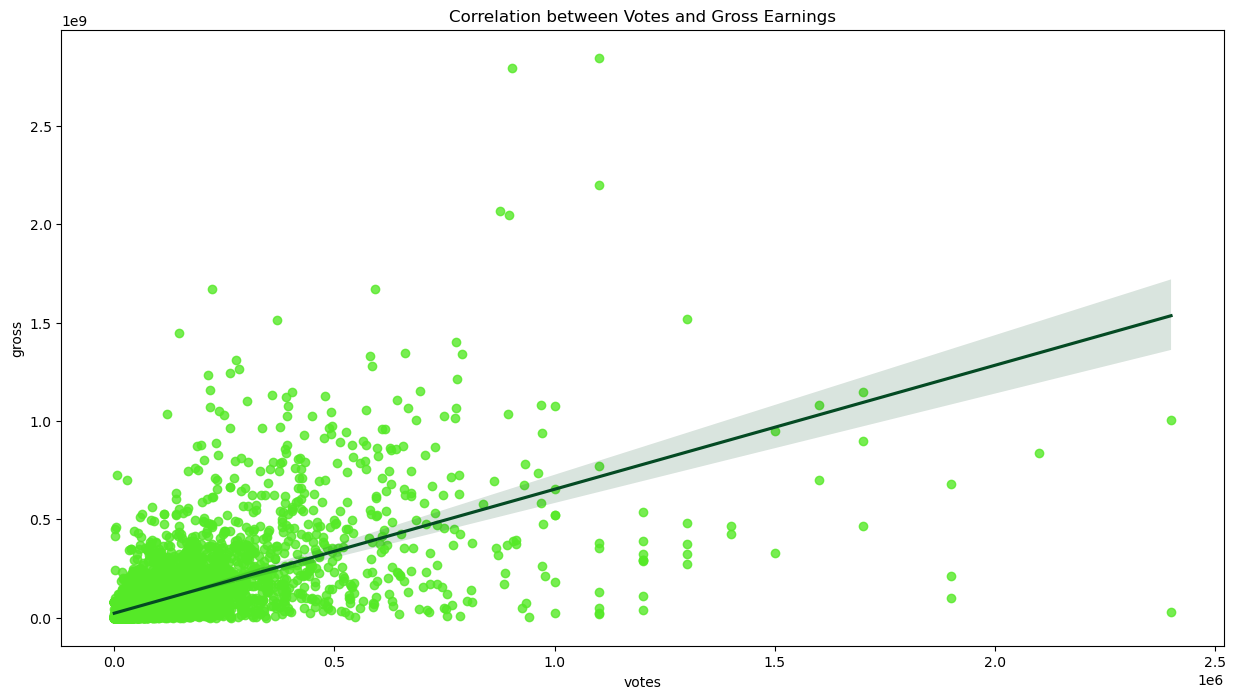

In [22]:
## Correlation between Votes anf Gross Earnings

sns.regplot(x = 'votes', y = 'gross',
            data = df,
            scatter_kws = {'color': '#55E927'},
            line_kws = {'color' : '#044A23'})

plt.title('Correlation between Votes and Gross Earnings')
plt.grid(False)

plt.show()

- The regression plot above depicts the positive correlation between votes and gross earnings.
- The light green scatter points represent individual `movies`
- Regression line represents a trend that more votes means greater gross earnings.

<font color = '#33E4FF'> *More Votes indicates Higher Gross Earnings* </font>

In [23]:
## Display pairs having correlation greater than 0.5

correlation_pairs = correlation_matrix.unstack()
correlation_pairs.sort_values()[correlation_pairs.sort_values() > 0.5]

gross    votes      0.628735
votes    gross      0.628735
budget   gross      0.711629
gross    budget     0.711629
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [24]:
## Top 15 Companies by Gross Revenue

Company_Gross_Revenue = df.groupby('company')[['gross']].sum()
Sorted_Gross_Revenue = Company_Gross_Revenue.sort_values('gross', ascending = False)[:15]
Sorted_Gross_Revenue

,gross
company,
Warner Bros.,56569922347
Universal Pictures,52592689431
Columbia Pictures,43008941346
Paramount Pictures,40572107956
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


array([<Axes: ylabel='gross'>], dtype=object)

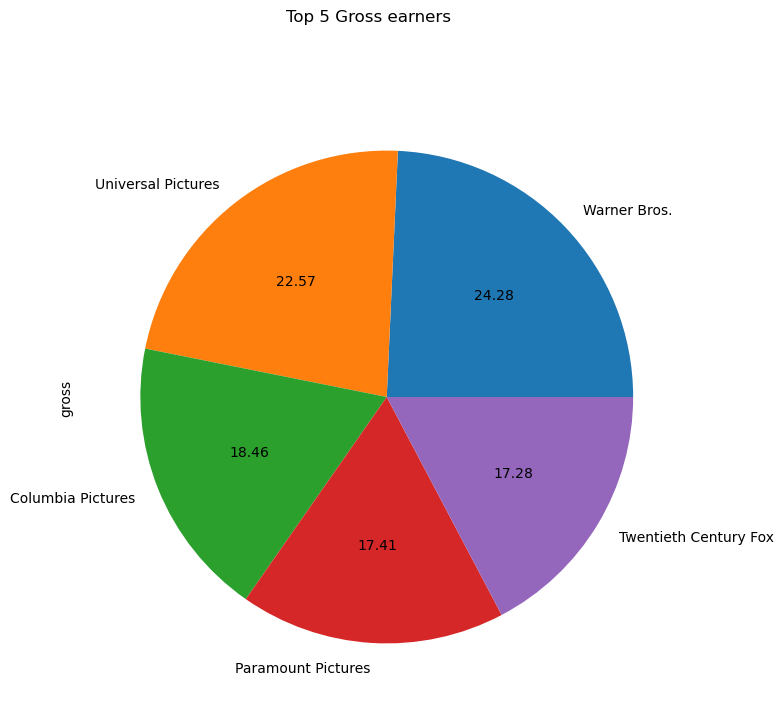

In [25]:
df1 = pd.DataFrame(Sorted_Gross_Revenue)
df1.head().plot(kind = 'pie', autopct = '%.2f', subplots = True, legend = False, title = 'Top 5 Gross earners')

In [26]:
## Highest Gross Earnings by Company in any year

Gross_Revenue_Year = df.groupby(['company', 'year'])[['gross']].sum()
Gross_Revenue_Year

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [27]:
## Top 15 Companies

Sorted_Gross_Yearly = Gross_Revenue_Year.sort_values('gross', ascending = False)[:15]
Sorted_Gross_Yearly

gross
company               year            
Walt Disney Pictures  2019  5773131804
Marvel Studios        2018  4018631866
Universal Pictures    2015  3834354888
Twentieth Century Fox 2009  3793491246
Walt Disney Pictures  2017  3789382071
Paramount Pictures    2011  3565705182
Warner Bros.          2010  3300479986
                      2011  3223799224
Walt Disney Pictures  2010  3104474158
Paramount Pictures    2014  3071298586
Columbia Pictures     2006  2934631933
                      2019  2932757449
Marvel Studios        2019  2797501328
Warner Bros.          2018  2774168962
Columbia Pictures     2011  2738363306

### <font color = '#FF7033'> Conclusion </font>

- This project invloved data cleaning & analyzing a movie industry dataset.
- The conclusion of correlation analysis is that : `budget` and `votes` have a high positive correlation to `gross earnings`
- `Warner Bros` and `Universal Studios` gross earnings are just short half of overall gross earnings by the top 5 industry leaders.
- This insight is valuable to decision-making in movie industry as per the dataset, and focussed correlation analysis.